# ENGR222 Lab 3 - Fun with curves

**Brendan Harding, Victoria University of Wellington**

**Last updated: 22th March 2021 (fixed a few typos while running the lab)**


## Introduction

Welcome to your third ENGR222 computer lab.
The aim of this lab is to have some fun playing around with some parametrised curves in 2D and 3D.
We'll also learn a little about interpolation along the way.

Before we get started, let's import matplotlib and numpy as we'll use them throughout.

In [1]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
%matplotlib inline

## The Euler/Cornu spiral

The Euler spiral is a two dimensional curve whose curvature changes linearly with respect to its curve length $s$.
It may be described by $\mathbf{r}(s)=x(s)\mathbf{i}+y(s)\mathbf{j}$ where
$$x(s)=\int_{0}^{s}\cos(u^2)\,du\,,\qquad y(s)=\int_{0}^{s}\sin(u^2)\,du\,.$$
There is no closed form expression for the result of these integrals, that is we cannot write down an explicit equation for $x(s),y(s)$.
However, observe that this description of the curve is with respect to its arclength $s$.
Specifically, notice that by the fundamental theorem of calculus
$$\mathbf{r}'(s)=\cos(s^2)\mathbf{i}+\sin(s^2)\mathbf{j}\,,$$
and therefore
$$\|\mathbf{r}'(s)\|=\sqrt{\cos(s^2)^2+\sin(s^2)^2}=\sqrt{1}=1\,.$$
Additionally, the curvature is given by $\kappa(s)=\|\mathbf{r}''(s)\|$, and since
$$\mathbf{r}''(s)=-2s\sin(s^2)\mathbf{i}+2s\cos(s^2)\mathbf{j}\,,$$
it follows that
$$\kappa(s)=\sqrt{4s^2\sin(s^2)^2+4s^2\cos(s^2)^2}=\sqrt{4s^2}=2|s|\,.$$
Thus, looking at $s\geq0$ we see the curve increases its curvature by 2 for every unit increment in length.

Because of the linear/gradual change in curvature, pieces of this curve are often used in road/rail design when a straight section transitions to a curve, or vice versa.

Okay, let's use some of our knowledge about esimtating integrals to try and draw this curve for $s\in[0,10]$. 
Since this requires evaluating the integral at many different $s$ values, the cumulative trapezoid method is a nice choice of method to achieve this.

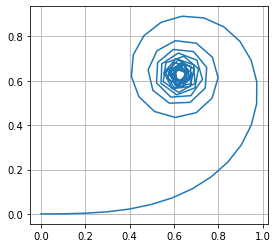

In [2]:
s = np.arange(0.0,10.01,0.1)
f = lambda u:np.cos(u**2)
g = lambda u:np.sin(u**2)
x = cumtrapz(f(s),s,initial=0)
y = cumtrapz(g(s),s,initial=0)
plt.plot(x,y)
plt.grid()
plt.gca().set_aspect(1.0)
plt.show()

Okay, our first sketch is a bit rough, but we can see that the curve starts at the origin and is approximately straight.
It then gets more and more curved as it proceeds and appears to be converging towards a specific point.
Because as the curve gets tighter as the arc length increases, each additional unit of arc length rotates more and more around the point the curve is converging towards.

Lets sample at a few more points to get a better sketch.

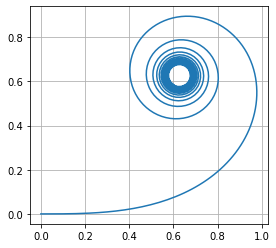

In [3]:
s = np.arange(0.0,10.01,0.02)
x = cumtrapz(f(s),s,initial=0)
y = cumtrapz(g(s),s,initial=0)
plt.plot(x,y)
plt.grid()
plt.gca().set_aspect(1.0)
plt.show()

Now it is important to remember that in using the cumulative trapezoid rule to calculate the integral our result is an approximation.
One thing we can check is how the arc length of our approximation compares to the expected arc length of $10$.
In particular, remember that `plt.plot` just plots a straight line between points, so the arc length of our sketch is the sum of distances between each successive pair of points, that is
$$L\approx\sum_{i=0}^{n-1}\sqrt{(x_{i+1}-x_i)^2+(y_{i+1}-y_i)^2}$$
We can compute this as follows.

In [4]:
L = np.sum(((x[1:]-x[:-1])**2+(y[1:]-y[:-1])**2)**0.5)
print(L)

9.933466605976172


Try and understand how this cell above works in relation to the sum described above.

Notice that our total arc length is less than the expected value of $s=10$.

One thing might do is look at how much the arc length of our approximation deviates from true arc length as $s$ increases.

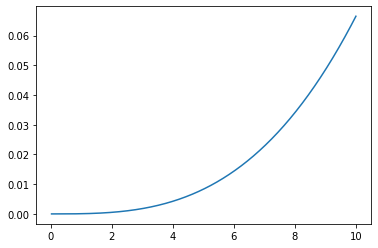

In [5]:
L = np.cumsum(((x[1:]-x[:-1])**2+(y[1:]-y[:-1])**2)**0.5)
plt.plot(s[1:],np.abs(L-s[1:]))
plt.show()

The error increases as $s$ increases. 
Additionally, it increases more rapidly as $s$ increases.
We can understand this because recall that the error of the trapzoidal rule can be bounded by the magnitude of the second derivative.
In this case the magnitude of the second derivative of the curve is the curvature which is increasing linearly.
Therefore we should expect the trapezoid rule to behave worse and worse for large $s$.

One way we might remedy this is to make our sampling of $s$ values finer as $s$ increases.
Observing that our integrals are of $\cos(u^2)$ and $\sin(u^2)$ then we could change our sampling so that $u^2$ is equally spaced (rather that $s$).
The following cell demonstrates one way to achieve. 

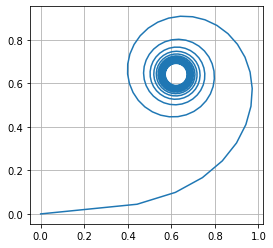

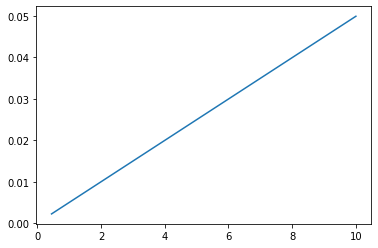

In [6]:
u2 = np.linspace(0.0,10.0**2,501)
s = u2**0.5
x = cumtrapz(f(s),s,initial=0)
y = cumtrapz(g(s),s,initial=0)
plt.plot(x,y)
plt.grid()
plt.gca().set_aspect(1.0)
plt.show()

L = np.cumsum(((x[1:]-x[:-1])**2+(y[1:]-y[:-1])**2)**0.5)
plt.plot(s[1:],np.abs(L-s[1:]))
plt.show()

Our plot of the spiral is now somewhat coarse initially, but improves as $s$ increases.
But, in the second plot, we see that the error in our estimation of the total arc length increases linearly.
Additionally, despite using the same number of points/samples over $s\in[0,10]$ we have achieved an small improvement in the final error when $s=10$.

It turns out that scipy has a special function for accurately evaluating the integrals describing the spiral.
Specifically these integrals are sometime known as Fresnel integrals and `scipy.special` provides the function `fresnel` which calculates
$$\text{fresnel(s)}=\left(\int_{0}^{s}\sin\left(\frac{\pi}{2}u^2\right)\,du\,,\,\int_{0}^{s}\cos\left(\frac{\pi}{2}u^2\right)\,du\right)\,.$$
Notice the additional $\pi/2$ factor here meand that the curvature increases according to $\pi|s|$ rather than $2|s|$, and also the order of the components is reversed.
Using this function we can easily evaluate the Euler spiral much more accurately.

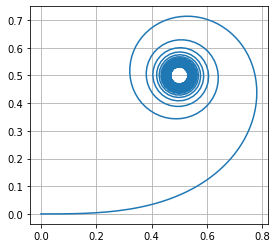

In [7]:
from scipy.special import fresnel
s = np.arange(0.0,10.1,0.02) # go back to our previous linear sampling of s
y,x = fresnel(s)
plt.plot(x,y)
plt.grid()
plt.gca().set_aspect(1.0)
plt.show()

**Exercises**

For the following questions use the definition of the spiral at the top of the notebook (not the alternatley scaled definition provided by the fresnel function).

 - Try plotting the Euler spiral over $s\in[-5,5]$ (you may need to be a little careful with how you adapt the code for this purpose). What do you notice about the part for negative $s$ in relation to the part for positive $s$?
 - Estimate the coordinates of the point along the curve which has arc length 2 from the origin.
 - Estimate the coordinates of the point at which the curve first intersects the line $y=x$ (after leaving the origin), you may do this "graphically". As a bonus question, estimate the arc length from the origin up to this point.

## A family of arc length parametrised curves

We can generalise the Euler spiral to obtain an interesting family of arc length parameterised curves.
Specifically, let $\theta(u)$ be a function whose first derivative exists and is continuous, then let $\mathbf{r}(s)=x(s)\mathbf{i}+y(s)\mathbf{j}$ where
$$x(s)=\int_{0}^{s}\cos(\theta(u))\,du\,, \qquad y(s)=\int_{0}^{s}\sin(\theta(u))\,du\,.$$

**Exercises:**

 - Show that this description of the curve is indeed an arc length parameterisation.
 - Show that the curvature is given by $\kappa(s)=|\theta'(s)|$.
 - Try plotting the resulting curve with $\theta(u)=u^3-9u$ for $s\in[0,5]$. 
 - Determine an $\theta(u)$ which produces a curve with $\kappa(s)=2|\cos(s)|$. Plot the resulting curve over $s\in[0,4\pi]$.
 - Come up with your own $\theta(u)$ that produces an interesting and/or whacky curve (hints: try functions involving a log, or exp, or multiple trig functions, etc.).


## Introduction to interpolation

Suppose instead of being provided with a parametrised curve we are instead provided with some data which is simply a list of points $(x_i,y_i)$ for $i=1,\dots,n$ through which a curve passes (or $(x_i,y_i,z_i)$ in 3D).
How can we construct/approximate a smooth curve through these points?

In order to answer this, we first consider a slightly different problem.

Let $x=f(t)$ be a parametrisation of the $x$ coordinate for $t\in[a,b]$.
We can sample $x=f(t)$ at several points $t_i$ in the interval $[a,b]$ to obtain $x_i=x(t_i)$.
Plotting a line through these points produces a *piecewise linear approximation* of the curve $(t,f(t))$.

Here is a brief example.

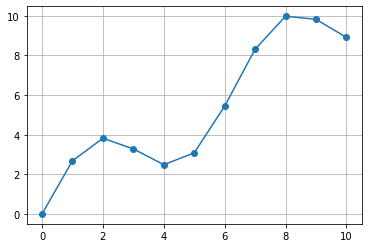

In [8]:
f = lambda t:2*np.sin(t)+t
t = np.linspace(0,10,11)
x = f(t)
plt.plot(t,x,'-C0')
plt.plot(t,x,'oC0')
plt.grid()
plt.show()

### Piecewise linear interpolation

This is a pretty rough plot, but that is on purpose.

If we were only given these data points and asked to approximate the function $f$ which produced them, then the above piecewise linear function is not an unreasonable way to approximate $f$. 
Notice the interpolating function passes through the sample points that were used in its construction.
This is a general feature of interpolating functions, a.k.a. interpolants.

However, while it was simple to plot this approximation, how would we calculate value of this approxiation for arbitrary $t$?

Give, say $t=\pi$ we can determine that we have sample points at $t=3,4$ either side and the corresponding $x$ values are $x\approx3.2822,2.4864$, respectively.
We can then explicitly construct the equation of the line between these points as
$$x(t)=3.2822+\frac{2.4864-3.2822}{4-3}(t-3)$$
and substitute $t=\pi$ to find that
$$x(\pi)\approx3.1695\,.$$
The true value of the curve that generated these points is $f(\pi)=\sin(\pi)+\pi=\pi\approx3.14159$ so this linear approximation is not too bad of a guess.

The error of the piecewise linear curve can be studied via Taylor polynomials.
It can be shown that if $f$ is twice differentiable and $|f''(t)|\leq M$ between two sample points $t_0<t_1$ then the linear approximation between those points has error of at most $\frac{(t_1-t_0)^2}{8}M$.

If we let $h$ be the largest distance between successive sample points, and $M$ be a bound on $|f''(t)|$ over the entire interval $[a,b]$, then the maximum interpolation error over the enitre interval is $\frac{h^2}{8}M$.

For our function above $|f''(t)|=|-\sin(t)|\leq 1$, therefore since our sample points have uniform distance $h=1$ between them the error should be at most $\frac{1^2}{8}\cdot1=0.125$.

This was indeed the case at $t=\pi$ where the error is approximately $0.0279$.

Okay, this is a nice bit of theory, but we honestly don't want to be constructing the equation of a line by hand every time we want to calculate a value along the interpolant.

Fortunately, `scipy.interpolate` includes routines for constructing interpolation functions, and one of these will handle piecewise linear functions.

In the following cell we import the `interp1d` function, we pass it the sample points $t_i,x_i$ computed earlier within the arrays `t,x`.
What interp1d then returns is an interpolating function, which I have assigned to `pl`, short for piecewise linear.
This function can be evaluated at any desired $t$ between the end points of the data ($t=0,10$ in this case).
For example, we can check our value of `pl`$(\pi)$ which we approximated earlier.

In [9]:
from scipy.interpolate import interp1d
pl = interp1d(t,x)
pl(np.pi)

array(3.16955421)

If we attempt to plot the `pl` function with lots and lots of sample points, we should see that it returns shows a piecewise linear function that looks the same as the one plotted earlier.
I.e. because the approximation of points in between the original sample points all lie on the line joining neighbouring points.

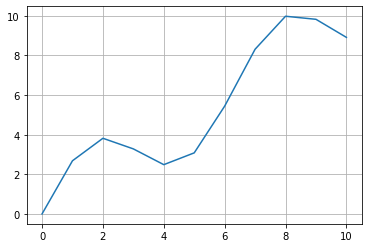

In [10]:
ts = np.linspace(0,10,101)
xs = pl(ts)
plt.plot(ts,xs)
plt.grid()
plt.show()

**Exercise**

 - Construct a piecewise linear function approximating $f(t)=\sqrt{9+8t-t^2}$ for $t\in[0,8]$ using $9$ equally spaced sample points. Calculate the value of the interpolating function at $t=1.7$ with the true value of the function.
 - Repeat the previous question but for the function $f(t)=e^t$ over the interval $t\in[0,3]$ using $13$ equally spaced points. Then, based on the discussion of error above, determine an suitable upper bound for the error of the piecewise linear approximation in this case.
 - Construct a piecewise linear approximation for some function of your own choosing. See what happens with to the approximation of a specific a function value when change the number of sample points used to construct the interpolant.

### Interpolating with polynomials

A piecewise linear approximation is simple and fast to construct and work with, but it is also a little crude.
It would be nice, for example, if we could construct an interpolating function that was smooth and did not have sharp corners.

There are many methods for constructing smooth interpolants/approximations of a function from data points.
Another classical approach is to construct a polynomial that passes through the given data.
Given $n$ sample points then one can construct a polynomial wth degree $n-1$ that passes through those points.
The construction is most easily done via the solutions of a linear system of equations and we won't go through the details here (possibly it will be revisited later in the course?).

From `scipy.interpolate` we can import the function `lagrange` which will construct such an interpolating polynomial (often referred to as the Lagrange interpolating polynomial, hence the function name).
We demonstrate this in the cell below for the data used previously.

In [11]:
from scipy.interpolate import lagrange
f = lambda t:2*np.sin(t)+t
t = np.linspace(0,10,11)
x = f(t)
lp = lagrange(t,x)
lp(np.pi)

3.1415764021244725

Here I've assigned the result to the variable `lp`, short for lagrange polynomial.
Notice our approximation of $f(\pi)$ is much better in this case.

In the following cell we plot the lagrange polynomial evaluated at many sample points.
Additionally we plot the original function at the same points.
The two overlap at this resolution indicating the polynomial is doing a good job.

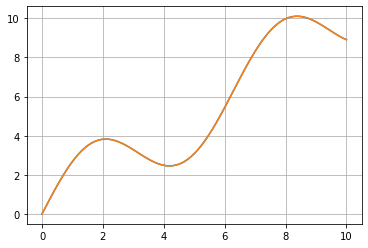

In [12]:
ts = np.linspace(0,10,101)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,lp(ts)) # plot of interpolating polynomial
plt.grid()
plt.show()

However, this example is a little misleading, interpolating with a high degree polynomial will often produce a result which is highly oscillatory, particularly near the end points.
The following cell demonstrates such an example.
The $f(t)=1/(1+25t^2)$ used here is known as Runge's function.

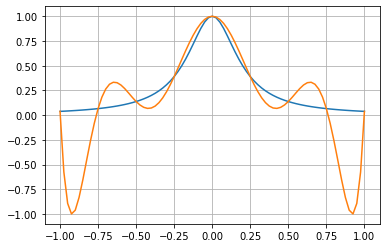

In [13]:
f = lambda t:1/(1+25*t**2) 
t = np.linspace(-1,1,9)
x = f(t)
lp = lagrange(t,x)
lp(np.pi)
ts = np.linspace(-1,1,81)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,lp(ts)) # plot of interpolating polynomial
plt.grid()
plt.show()

You can try increasing the number of points used in the initial sample `t`.
You will find the result may appear better in the middle but even worse near the ends.
This is known as Runge's phenomena.

One way to overcome this is to modify the spacing of the sample points.
Rather than choose equally spaced sample points we can choose points that have a very specific spacing obtained via the cosine function.
This specific choice of spacing when constructing the polynomial interpolation function is closely related to Chebyshev polynomials.
We won't go into the details of this, but instead demonstrate how this works in the case of the Runge's function.

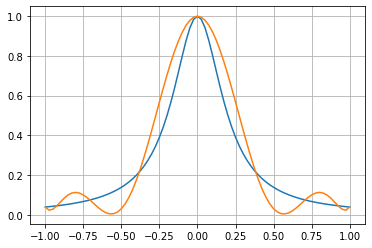

In [14]:
f = lambda t:1/(1+25*t**2) 
a = -1 # left endpoint of t interval
b =  1 # right endpoint of t interval
t = (a+b)/2-(b-a)/2*np.cos(np.linspace(0,np.pi,9))
x = f(t)
lp = lagrange(t,x)

ts = np.linspace(a,b,81)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,lp(ts)) # plot of interpolating polynomial
plt.grid()
plt.show()

Notice the approximation is not perfect, but at least does not significantly deviate near the ends.

There are error formula associated with polynomial interpolants, but they are a little too technical for us to cover in this course.

It is worth noting that the `lagrange` function from `scipy.interpolate` is numerically unstable. A consequence of this is that is you construct a very high degree polynomial then sampling/evaluating the interpolating polynomial will become inaccurate.

**Exercise**

 - Try constructing the interpolating polynomial of $f(t)=\sqrt{9+8t-t^2}$ over $t\in[0,8]$ using $9$ equally spaced sample points. If you think the result is poor, try choosing unequal sample points using the cosine function as was demonstrated above.
 - Repeat the previous question for $f(t)=e^t$ over the interval $t\in[0,3]$ using $13$ equally spaced points.
 - Repeat this again for a function of your own choosing. You may like to try coming up with a function like Runge's function which is produces a highly oscillatory polynomial when using equally spaced points but improves when using the cosine function to construct the points.

### Piecewise polynomials

Rather than have one high degree polynomial passing through all of the points, we could construct lower degree polynomials between just a few points at a time.
This produces what is called a piecewise polynoial interpolant.
This tends to avoid Runge's phenomenon described previously, but can produce curves that have sharp edges.

The following cell combines the `lagrange` function with `PPoly` (also from `scipy.interpolate`) to produce a piecewise quadratic interpolant of Runge's function.
Don't worry too much about the details of what is going on here.
Essentially we break the interval into 4 pieces and construct a quadratic polynomial interpolating function on each sub-interval and then put it all together as a single piecewise quadratic interpolating function.
The main thing to notice is the result is nice and smooth on each of the four sub-intervals but there is a sharp edge in between which is particularly noticable at $t=0$

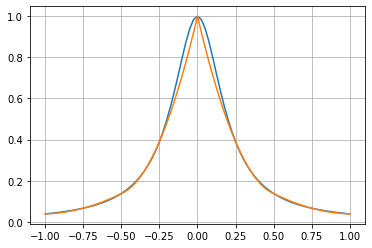

In [15]:
from scipy.interpolate import PPoly
f = lambda t:1/(1+25*t**2) 
a = -1  # left end point of t
b =  1  # right end point of t
d =  2  # degree of each polynomial
n =  4  # total number of polynomial pieces
m = d*n+1 # total number of sample points
t = np.linspace(a,b,m)
x = f(t)
c = np.empty((d+1,n))
for i in range(n):
    c[:,i] = lagrange(t[i*d:i*d+d+1]-t[i*d],x[i*d:i*d+d+1]).c
pq = PPoly(c,t[::d]) # pq is the piecewise quadratic interpolating function

ts = np.linspace(a,b,81)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,pq(ts)) # plot of interpolating polynomial
plt.grid()
plt.show()

**Exercise**

 - Copy and paste the previous cell, then modify the function and the end points to construct piecewise quadratic interpolants for some of the other functions we have interpolated previously.

### Spline interpolation

Spline interpolation seeks to construct a piecewise polynomial approximations which are smooth, i.e. don't have sharp edges.
One of the most popular and widely implemented example is cubic spline interpolation.
Cubic interpolating splines has the properties:

 - The interpolant passes through the samples points (as one expects for any interpolant)
 - The interpolant is a piecewise cubic polynomial
 - The first and second derivatives of the interpolant are continuous (hence the smooth appearance).
 
We won't go into the details of the construction of interpolating splines but jump straight into constructing them using `scipy`.
It turns out the function `interp1d` we considered way back at the beginning can construct a cubic spline interpolant, we only need to add the argument `kind='cubic'`.
We demonstrate below with Runge's function.

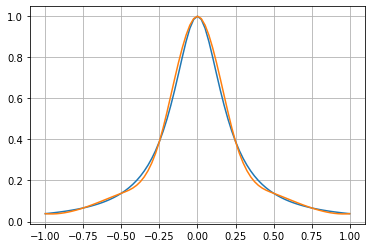

In [16]:
f = lambda t:1/(1+25*t**2) 
a = -1 # left endpoint of t interval
b =  1 # right endpoint of t interval
t = np.linspace(a,b,9)
x = f(t)
cs = interp1d(t,x,kind='cubic')

ts = np.linspace(a,b,81)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,cs(ts)) # plot of the cubic spline
plt.grid()
plt.show()

Notice the result is a nice smooth curve.

Generally we expect the error of a cubic spline interpolant to decay proportional to $h^4$ if sample points are equally spaced with gap $h$ between them.
The exact error formula involves the 4th derivative of $f(t)$ and an additional constant factor.
We won't worry about the details, but one consequence is a cubic spline may do a poor job in areas where $f^{(4)}(t)$ is large or doesn't exist.

**Exercise**

 - Try constructing a cubic spline interpolant for some of the other functions considered previously, e.g. $\sqrt{9+8t-t^2}$ over $t\in[0,8]$ and $e^t$ over $t\in[0,3]$.
 - Try and come up with an example where the cubic spline interpolant doesn't do so well.

### Calculating derivatives and integrals over an interpolating spline

Another `scipy.interpolate` function for constructing a cubic spline interpolant is `UnivariateSpline`.
The result is the same as that of `interp1d` except it has the advantage you can additionally evaluate the derivative or an integral of the interpolant with ease.
These will both be useful soon when we appply the splines to constructing/approximating parameterised curves.

The following cell demonstrates the use of `UnivariateSpline` for Runge's function.
Note that constructing a cubic spline is the default behaviour, but we need to specify `s=0` as an extra argument to ensure we get an interpolating spline.

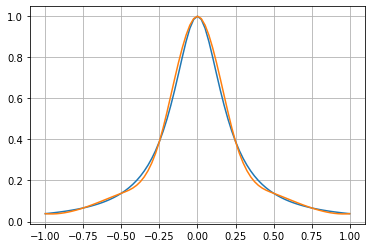

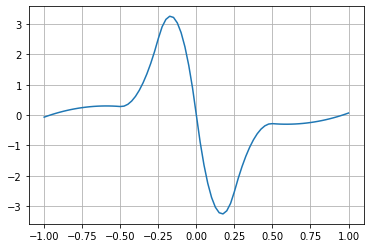

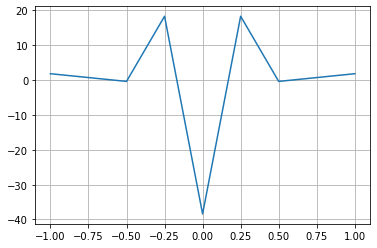

0.5561942880152754

In [17]:
from scipy.interpolate import UnivariateSpline
f = lambda t:1/(1+25*t**2) 
a = -1 # left endpoint of t interval
b =  1 # right endpoint of t interval
t = np.linspace(a,b,9)
x = f(t)
cs = UnivariateSpline(t,x,s=0) 

ts = np.linspace(a,b,81)
plt.plot(ts,f(ts))  # plot of original function
plt.plot(ts,cs(ts)) # plot of the cubic spline
plt.grid()
plt.show()

plt.plot(ts,cs(ts,1)) # plot first derivative of the cubic spline
plt.grid()
plt.show()

plt.plot(ts,cs(ts,2)) # plot second derivative of the cubic spline
plt.grid()
plt.show()

cs.integral(a,b) # evaluate the integral of the spline over the full interval a<=t<=b

This provides another way to numerically approximate the numerical derivatives and integrals of a functions $y=f(x)$. We can first construct an interpolating spline which approximates the function via `UnivariateSpline` and then calculate derivatives/integrals using the spline to approximate the corresponding derivatives/integrals of $y=f(x)$.

**Exercise**

 - Try out UnivariateSpline on the other functions you have interpolated previously. Plot the first and second derivatives of the interpolants, and calculate the integral of the spline between the end points. Think about how these compare with the derivatives and integral of the original function $f$.

## Constructing parameterised curves via interpolation in 2D

Now we are going to use interpolation to construct some parameterised curves.

Consider a parameterised two dimensional curve has the form
$$(x,y)=(f(t),g(t))\,,\qquad t\in[a,b]$$
Suppose we have some points $(x_i,y_i)$ along with times $t_i$ and we want to construct a curve through these points, then we can construct two cubic spline interpolants, one to approximate $x=f(t)$ using the $(t_i,x_i)$ pairs, and another to approimate $y=g(t)$ using the $(t_i,y_i)$ pairs.

The following cell demonstrates this and then plots the resulting curve.

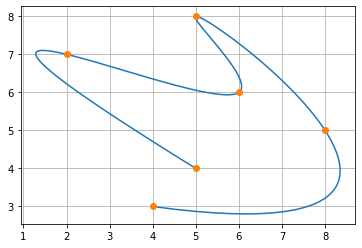

In [18]:
ti = [0,1,2,3,4,5]
xi = [4,8,5,6,2,5]
yi = [3,5,8,6,7,4]
f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
t = np.linspace(ti[0],ti[-1],129)
plt.plot(f(t),g(t)) # plot the smooth curve
plt.plot(xi,yi,'o') # plot the data points
plt.grid()
plt.show()

There are now lots of things we can investigate with this parameterised curve, for example its arc length, its tangent and normal vectors, and even its curvature.

The ability to calculate derivatives from the function returned by `UnivariateSpline` is particularly useful in this respect.

The following cell demonstrates how one can estimate each of these.

arc length 22.43525268822667
(error) 2.6652718427127294e-07


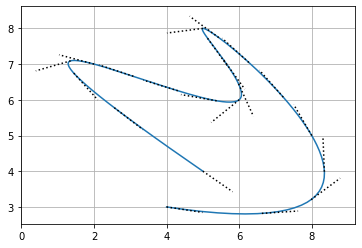

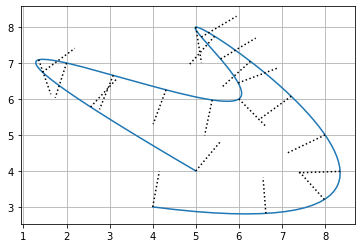

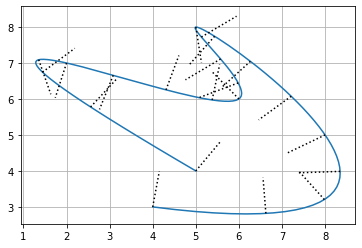

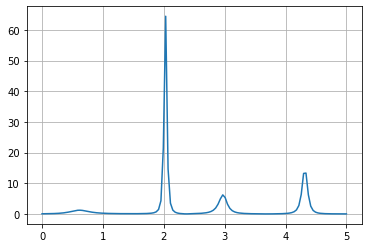

In [19]:
# Set up a function to calculate the 'speed' along the curve, 
# i.e. ||(f'(t),g'(t))||=sqrt(f'(t)^2+g'(t)^2)
dfdt = f.derivative()
dgdt = g.derivative()
speed = lambda t:(dfdt(t)**2+dgdt(t)**2)**0.5

# Integrate over the 'speed' to get the arc length
from scipy.integrate import quad
arc_length,error = quad(speed,ti[0],ti[-1])
print('arc length',arc_length)
print('(error)',error)

# Use the speed to calculate unit tangent vectors at several points along the curve
ts = np.linspace(t[0],t[-1],21)
Tx = dfdt(ts)/speed(ts) # f'(t)/sqrt(f'(t)^2+g'(t)^2)
Ty = dgdt(ts)/speed(ts) # g'(t)/sqrt(f'(t)^2+g'(t)^2)
rx = f(ts)
ry = g(ts)
plt.plot(f(t),g(t)) # plot the smooth curve
for i in range(len(ts)):
    plt.plot([rx[i],rx[i]+Tx[i]],[ry[i],ry[i]+Ty[i]],'k:') # plot a unit tangent
plt.grid()
plt.show()

# Same as above, but plotting unit normals 
# (Note: these are not the principal normals)
Nx = -Ty
Ny =  Tx
plt.plot(f(t),g(t)) # plot the smooth curve
for i in range(len(ts)):
    plt.plot([rx[i],rx[i]+Nx[i]],[ry[i],ry[i]+Ny[i]],'k:') # plot a unit normal
plt.grid()
plt.show()

# We can calculate the principal normals using the second derivatives.
# The formula used here is not one you've seen, 
# but notice the principal normals always point to the inside of the bend.
d2fdt2 = dfdt.derivative() # f''(t)
d2gdt2 = dgdt.derivative() # g''(t)
nx = d2fdt2(ts)*dgdt(ts)**2-dfdt(ts)*dgdt(ts)*d2gdt2(ts)
ny = d2gdt2(ts)*dfdt(ts)**2-dfdt(ts)*dgdt(ts)*d2fdt2(ts)
magnitude = (nx**2+ny**2)**0.5
PNx = nx/magnitude
PNy = ny/magnitude
plt.plot(f(t),g(t)) # plot the smooth curve
for i in range(len(ts)):
    plt.plot([rx[i],rx[i]+PNx[i]],[ry[i],ry[i]+PNy[i]],'k:') # plot the principal unit normal
plt.grid()
plt.show()

# Plot the curvature as a function of t, using ||r'(t) x r''(t)||/||r'(t)||^3
# Notice it has peaks around the sharp corners
kappa = lambda t:np.abs(dfdt(t)*d2gdt2(t)-dgdt(t)*d2fdt2(t))/speed(t)**3
plt.plot(t,kappa(t))
plt.grid()
plt.show()

Note the shape of the curve will be sensitive to the specific choice of $t_i$ value, even if the points $(x_i,y_i)$ remain the same. 
Specifically, if I change the $t_i$ so that they are not just a simply linear mapping of the original $t_i$ then the shape of the curve will change.
In the example above I chose evenly spaced $t_i$, so if I change to unevenly spaced $t_i$ then the shape will change.
The following cell illustrates this.

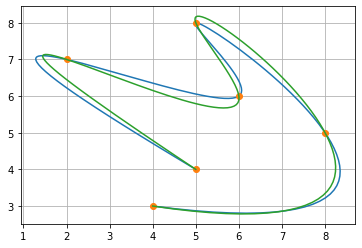

In [20]:
ti = [0,1,2,3,4,5]
xi = [4,8,5,6,2,5]
yi = [3,5,8,6,7,4]
f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
t = np.linspace(ti[0],ti[-1],129)
plt.plot(f(t),g(t)) # plot the original smooth curve
plt.plot(xi,yi,'o') # plot the data points
ti2 = [0,1,2.2,2.8,4,5] # define a different ti, changing two numbers slightly
f2 = UnivariateSpline(ti2,xi,s=0)
g2 = UnivariateSpline(ti2,yi,s=0)
plt.plot(f2(t),g2(t)) # plot the new smooth curve
plt.grid()
plt.show()

**Exercises**

 - Make up your own list of $t_i$ and sample points $(x_i,y_i)$ and then construct a smooth parameterised curve through those points using the UnivariateSpline function.
 - Once you have your interpolating functions which described the parameterised curve, try calculating the arc length, plotting the tangents and normal vectors at various points, and also calculating the curvature.
 - Now imagine a particle moving along your curve. See if you can calculate the *tangential scalar component of acceleration* and the *normal scalar component of acceleration*, i.e. $a_T$ and $a_N$, and plot these one the same figures (with $t$ on the horizontal axis).
 
Hint: for the last exercise it may be useful to remember that
$$a_T=\frac{d^2 s}{dt^2}=\frac{\mathbf{r}'(t)\cdot\mathbf{r}''(t)}{\|\mathbf{r}'(t)\|}\,,\qquad
a_N=\kappa(t)\left(\frac{ds}{dt}\right)^2=\frac{\|\mathbf{r}'(t)\times\mathbf{r}''(t)\|}{\|\mathbf{r}'(t)\|}\,.$$

## Constructing parameterised curves via interpolation in 3D

We are now essentially going to repeat the above, except for a 3D parameterised curve
$$(x,y,z)=(f(t),g(t),h(t))\,,\qquad t\in[a,b]\,.$$
The construction of the curve is identical except we now have a third interpolating spline for $z=h(t)$.

I will demonstrate with an example, but we are about to start plotting in 3D and for this it will be useful to *restart your kernel* and re-import numpy and matplotlib as per the cell below. 

To restart your kernel, look for the `Kernel` drop down menu at the top of the notebook, then click `Restart`, then a warning message appears and you click `Restart` again (in red). Once this is done execute the cell below to import numpy and matplotlib again.

In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

There are two differences here.
The first is the addition of the import `from mpl_toolkits.mplot3d import Axes3D` which will allow us to produce 3D plots.
The second difference is the line `%matplotlib notebook` where previously we used `inline` which has been replaced with `notebook`. 
This change is why we needed to restart the kernel. 
This will allow us to interact with our 3D plots, in particular we will be able to change the view angle by clicking and dragging on the plot.

(Aside: we could have also used `notebook` from the beginning instead of `inline` with the previous 2D plots, but I personally find the behaviour of the interactive plots a bit annoying when plotting in 2D, the `inline` option is cleaner and simpler for 2D plotting.)

Okay, now for the promised 3D example!

<IPython.core.display.Javascript object>


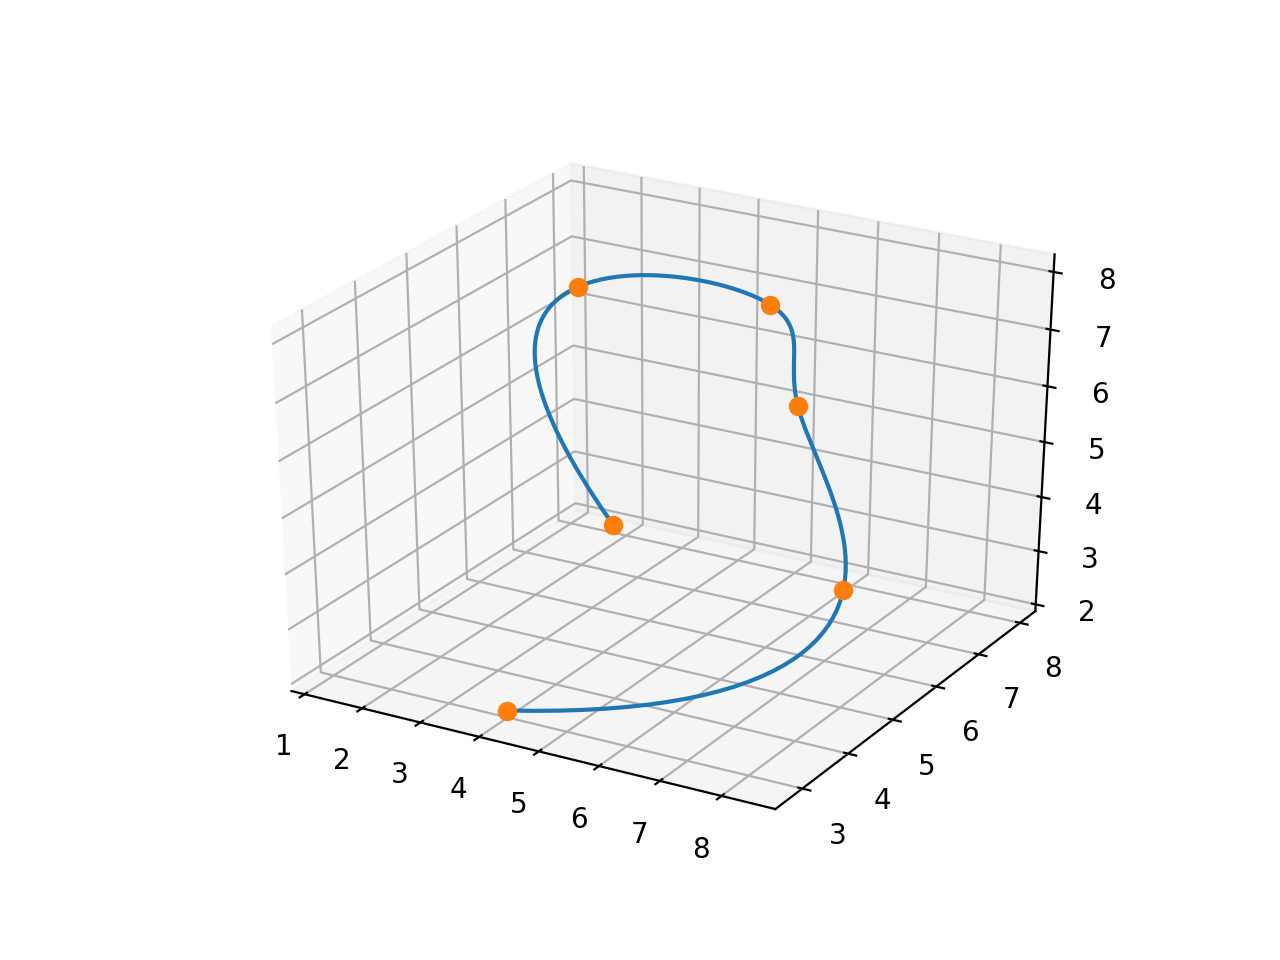

In [2]:
# Specify the data points
ti = [0,1,2,3,4,5]
xi = [4,8,5,6,2,5]
yi = [3,5,8,6,7,4]
zi = [2,4,5,8,7,5]
# Construct the interpoating splines
from scipy.interpolate import UnivariateSpline
f = UnivariateSpline(ti,xi,s=0)
g = UnivariateSpline(ti,yi,s=0)
h = UnivariateSpline(ti,zi,s=0)
# Set up a finer sampleing of t for making a smooth plot
t = np.linspace(ti[0],ti[-1],129)
# The following 2 lines will setup an axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# We need to use ax.plot(...) rather than plt.plot(...) now
ax.plot(f(t),g(t),h(t)) # plot the smooth curve
ax.plot(xi,yi,zi,'o')   # plot the data points
# Lastly call plt.show() as per normal
plt.show()

As before, we can go on to analyse the properties of our curve.
In addition to the tangents and principal normals we can also determine the binormal vectors.
Some of the formulas for these become a bit longer in 3D, but conceptually we are doing the same thing.

Here is an example.

arc length 25.521295161266462
(error) 3.592539677182347e-08


<IPython.core.display.Javascript object>


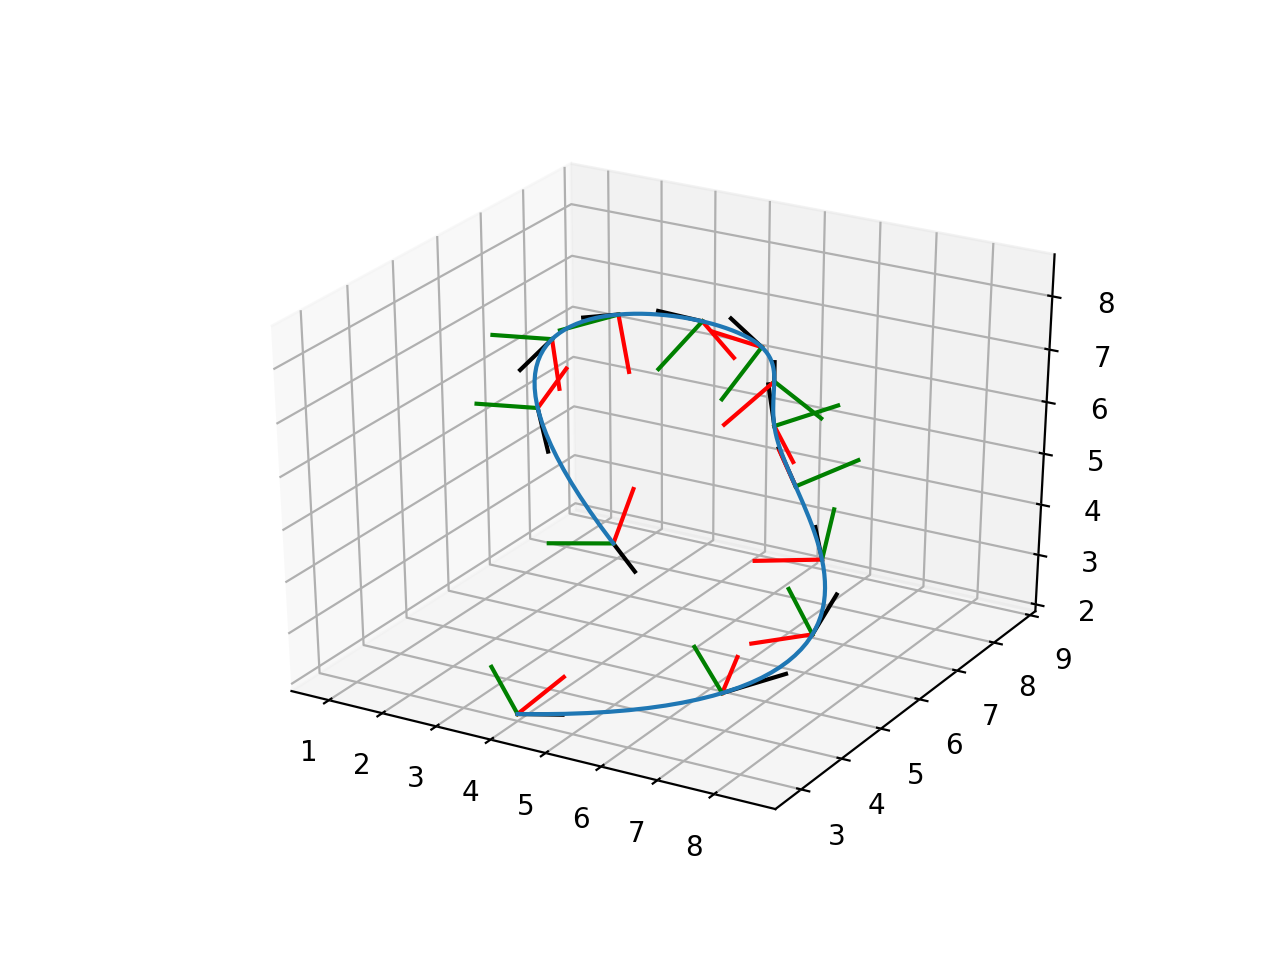

<IPython.core.display.Javascript object>


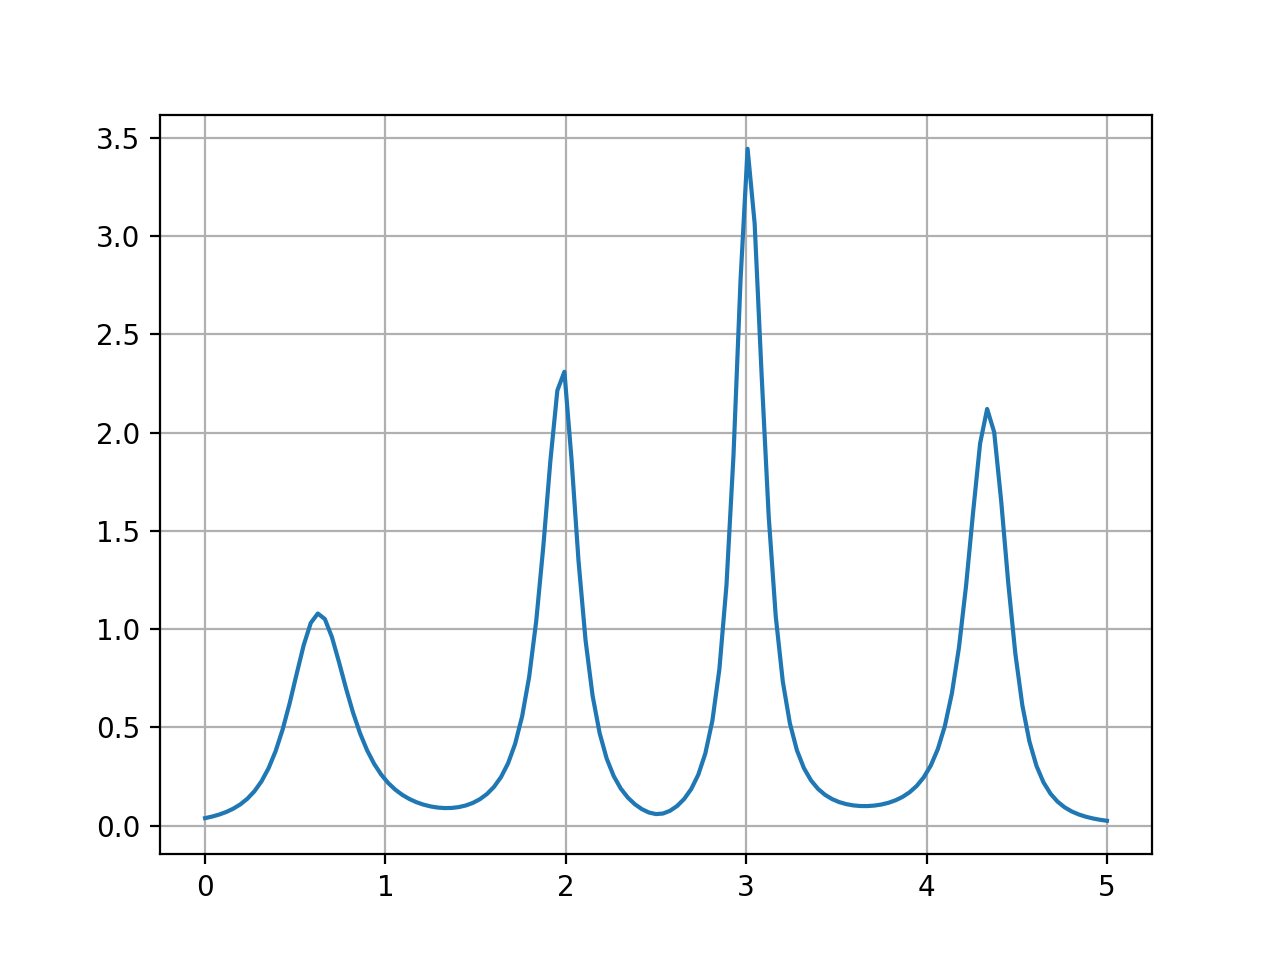

In [3]:
# Define functions describing the position, velocity and acceleration vectors
r = lambda t:np.array([f(t),g(t),h(t)]).T
dfdt = f.derivative()
dgdt = g.derivative()
dhdt = h.derivative()
v = lambda t:np.array([dfdt(t),dgdt(t),dhdt(t)]).T
d2fdt2 = dfdt.derivative()
d2gdt2 = dgdt.derivative()
d2hdt2 = dhdt.derivative()
a = lambda t:np.array([d2fdt2(t),d2gdt2(t),d2hdt2(t)]).T

# Set up a function to calculate the 'speed' along the curve, i.e. ||v(t)||
speed = lambda t:np.linalg.norm(v(t),axis=-1)

# Integrate over the speed to get the arc length
from scipy.integrate import quad
arc_length,error = quad(speed,ti[0],ti[-1])
print('arc length',arc_length)
print('(error)',error)

# At a small number of t values, we'll calculate and plot the
# unit tangent, principal unit normal, and binormal vectors.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ts = np.linspace(t[0],t[-1],13) # small number of t values
for tk in ts:
    rk = r(tk)
    vk = v(tk)
    ak = a(tk)
    Tk = vk/np.linalg.norm(vk)
    Nk = ak*np.dot(vk,vk)-vk*np.dot(ak,vk)
    Nk /= np.linalg.norm(Nk)
    Bk = np.cross(Tk,Nk)
    ax.plot([rk[0],rk[0]+Tk[0]],[rk[1],rk[1]+Tk[1]],[rk[2],rk[2]+Tk[2]],'k-') # plot a unit tangent
    ax.plot([rk[0],rk[0]+Nk[0]],[rk[1],rk[1]+Nk[1]],[rk[2],rk[2]+Nk[2]],'r-') # plot the principal unit normal
    ax.plot([rk[0],rk[0]+Bk[0]],[rk[1],rk[1]+Bk[1]],[rk[2],rk[2]+Bk[2]],'g-') # plot the binormal
ax.plot(f(t),g(t),h(t)) # plot the smooth curve
plt.show()

# Plot the curvature as a function of t 
kappa = lambda t:np.linalg.norm(np.cross(v(t),a(t)),axis=-1)/speed(t)**3
plt.figure() # Note: This is required to start a new plot when using '%matplotlib notebook'
plt.plot(t,kappa(t)) # We want an ordinary 2D plot of kappa vs t in this case
plt.grid()
plt.show()

**Exercises**

 - Make up your own list of $t_i$ and 3D sample points $(x_i,y_i,z_i)$ and then construct a smooth parameterised curve through those points using the UnivariateSpline function.
 - Once you have your interpolating functions which described the parameterised curve, try calculating the arc length, plotting the tangents and normal vectors at various points, and also calculating the curvature.
 - Now imagine a particle moving along your curve. See if you can calculate the *tangential scalar component of acceleration* and the *normal scalar component of acceleration*, i.e. $a_T$ and $a_N$, and plot these one the same figures (with $t$ on the horizontal axis).
 
